In [ ]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import tensorflow_hub as hub
import ipywidgets as widgets
from PIL import Image
import io
# Neural Style Transfer (Modifikasi dari Art_Generation.ipynb)

# Fungsi untuk menampilkan gambar
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return Image.fromarray(tensor)


In [ ]:
def load_img(path_to_img, max_dim=1024):
    img = Image.open(path_to_img)
    img = tf.image.convert_image_dtype(np.array(img), tf.float32)
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim
    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [ ]:
def load_img(path_to_img, max_dim=1024):
    img = Image.open(path_to_img)
    img = tf.image.convert_image_dtype(np.array(img), tf.float32)
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim
    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

# Upload widget
content_upload = widgets.FileUpload(accept='image/*', multiple=False)
style_upload = widgets.FileUpload(accept='image/*', multiple=False)
display.display(content_upload, style_upload)

FileUpload(value={}, accept='image/*', description='Upload')

FileUpload(value={}, accept='image/*', description='Upload')

In [ ]:
def get_image(file_upload):
    image = Image.open(io.BytesIO(list(file_upload.value.values())[0]['content']))
    return image

# Gunakan TensorFlow Hub pre-trained model
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def stylize_image(content_img, style_img):
    content = tf.image.convert_image_dtype(np.array(content_img), tf.float32)[tf.newaxis, ...]
    style = tf.image.convert_image_dtype(np.array(style_img), tf.float32)[tf.newaxis, ...]
    outputs = hub_model(content, style)
    return tensor_to_image(outputs[0])

Button(description='Stylize!', style=ButtonStyle())

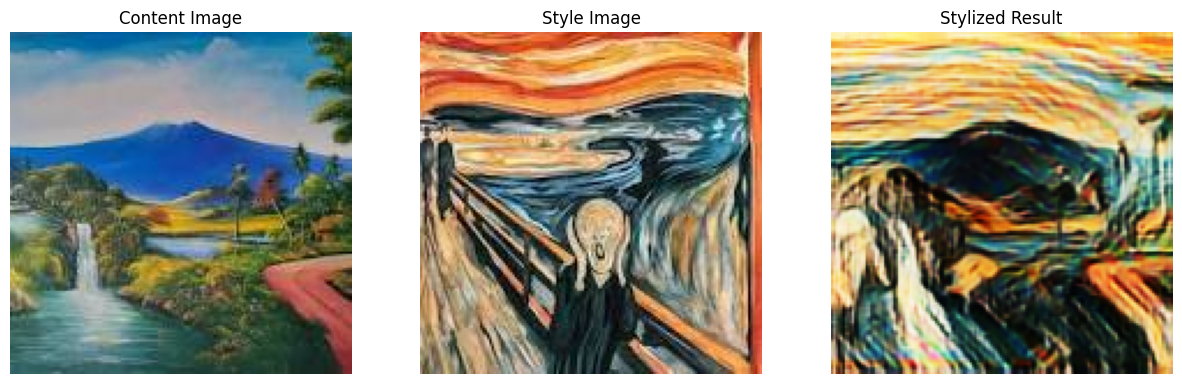

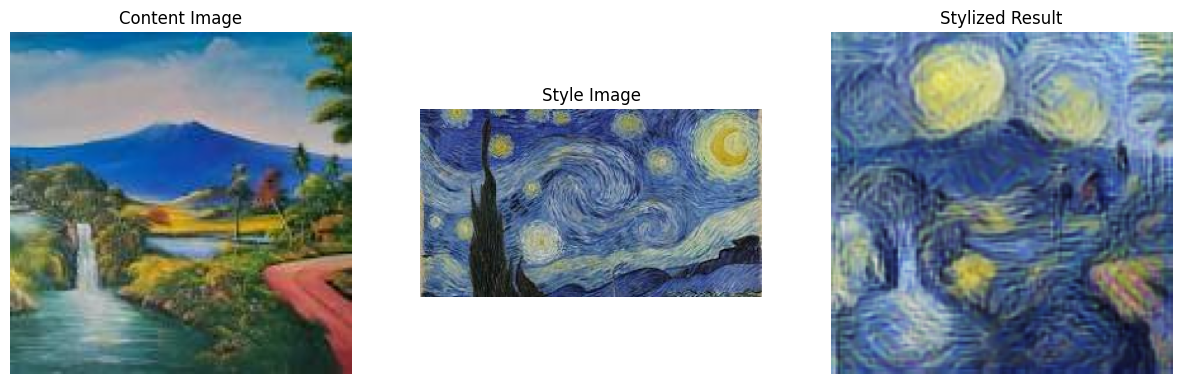

In [ ]:
# Proses stylisasi setelah upload
def process():
    if content_upload.value and style_upload.value:
        content_img = get_image(content_upload)
        style_img = get_image(style_upload)
        stylized_image = stylize_image(content_img, style_img)

        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(content_img)
        plt.title("Content Image")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(style_img)
        plt.title("Style Image")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(stylized_image)
        plt.title("Stylized Result")
        plt.axis('off')

        plt.show()

run_button = widgets.Button(description="Stylize!")
run_button.on_click(lambda x: process())
display.display(run_button)
